In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def load_data(image_dir, mask_dir):
    image_files = os.listdir(image_dir)

    images = []
    masks  = []

    for img_file in tqdm(image_files):
        img_path  = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, f"mask_{img_file}")

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        else:
            mask = np.zeros_like(image)

        images.append(image)
        masks.append(mask)

    images = np.array(images)
    masks  = np.array(masks)

    return images, masks

# 📌 مسیرها
train_image_dir = r"C:\Users\Ehsan\jupyter projects\ml-covid-project\Covid19\archive\QaTa-COV19-v2\Train Set\Images"
train_mask_dir  = r"C:\Users\Ehsan\jupyter projects\ml-covid-project\Covid19\archive\QaTa-COV19-v2\Train Set\Ground-truths"

test_image_dir = r"C:\Users\Ehsan\jupyter projects\ml-covid-project\Covid19\archive\QaTa-COV19-v2\Test Set\Images"
test_mask_dir  = r"C:\Users\Ehsan\jupyter projects\ml-covid-project\Covid19\archive\QaTa-COV19-v2\Test Set\Ground-truths"

# 📥 لود
train_images, train_masks = load_data(train_image_dir, train_mask_dir)
test_images, test_masks   = load_data(test_image_dir,  test_mask_dir)

print("Train images shape:", train_images.shape)
print("Test images shape :", test_images.shape)


100%|██████████| 2113/2113 [00:02<00:00, 985.57it/s] 


Train images shape: (7145, 224, 224)
Test images shape : (2113, 224, 224)


In [8]:
images, masks = load_data(train_image_dir, train_mask_dir)


100%|██████████| 7145/7145 [00:07<00:00, 947.17it/s] 


In [ ]:
# def preprocess_image(image, target_size=(224,224)):
#     image = cv2.resize(image, target_size)
#     image = image.astype('float32') / 255.0
#     image = np.expand_dims(image, axis=-1)
#     return image

# def preprocess_mask(mask, target_size=(224,224)):
#     mask = cv2.resize(mask, target_size)
#     mask = (mask > 0).astype('float32')
#     mask = np.expand_dims(mask, axis=-1)
#     return mask

# processed_images = []
# processed_masks  = []

# for i in tqdm(range(len(images))):
#     img = preprocess_image(images[i])
#     msk = preprocess_mask(masks[i])

#     processed_images.append(img)
#     processed_masks.append(msk)

# processed_images = np.array(processed_images)
# processed_masks  = np.array(processed_masks)


100%|██████████| 7145/7145 [00:02<00:00, 3506.43it/s]


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm  
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0  # normalize to 0-1
    image = np.expand_dims(image, axis=-1)  # shape: (224, 224, 1)
    return image

def preprocess_mask(mask, target_size=(224, 224)):
    mask = cv2.resize(mask, target_size)
    mask = (mask > 0).astype('float32')  # binary mask (0, 1)
    mask = np.expand_dims(mask, axis=-1)  # shape: (224, 224, 1)
    return mask

processed_images = []
processed_masks  = []

for i in tqdm(range(len(images))):
    img  = preprocess_image(images[i])
    msk  = preprocess_mask(masks[i])

    processed_images.append(img)
    processed_masks.append(msk)

processed_images = np.array(processed_images)
processed_masks  = np.array(processed_masks)

print("Processed Images shape:", processed_images.shape)
print("Processed Masks shape: ", processed_masks.shape)


100%|██████████| 7145/7145 [00:02<00:00, 3429.50it/s]


Processed Images shape: (7145, 224, 224, 1)
Processed Masks shape:  (7145, 224, 224, 1)


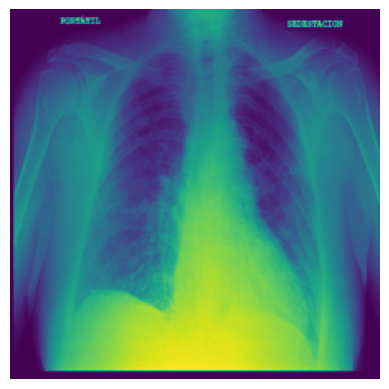

In [11]:
import matplotlib.pyplot as plt

plt.imshow(images[3])
plt.axis('off')  # Optional: hides the axis for a cleaner look
plt.show()


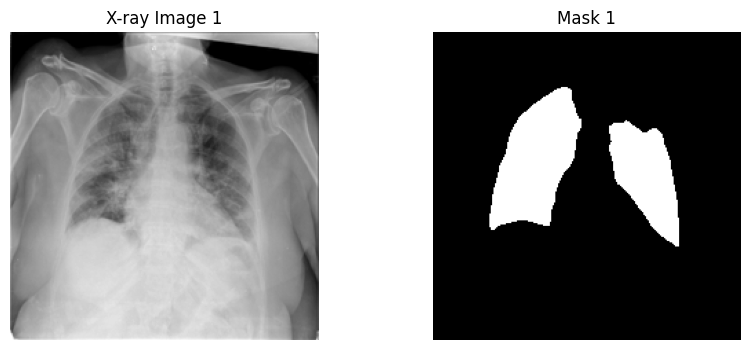

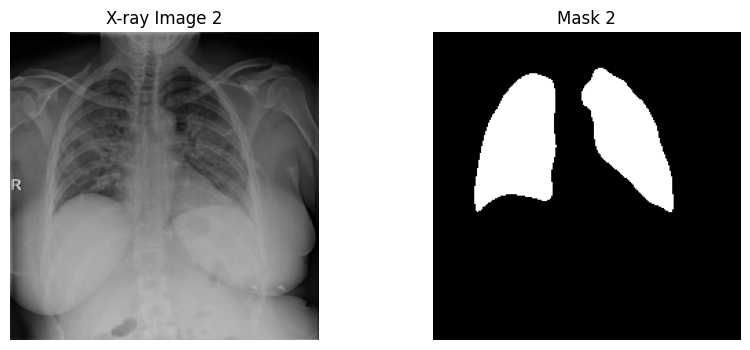

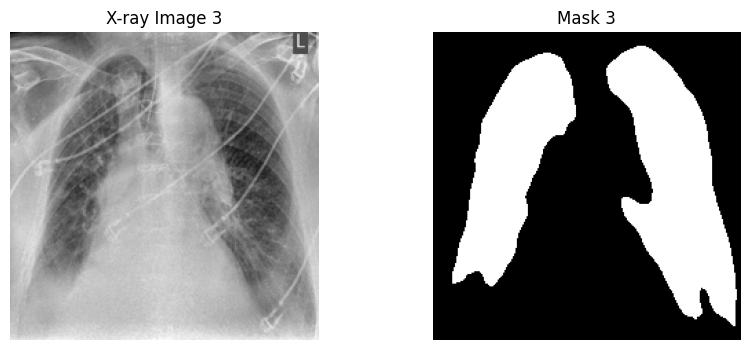

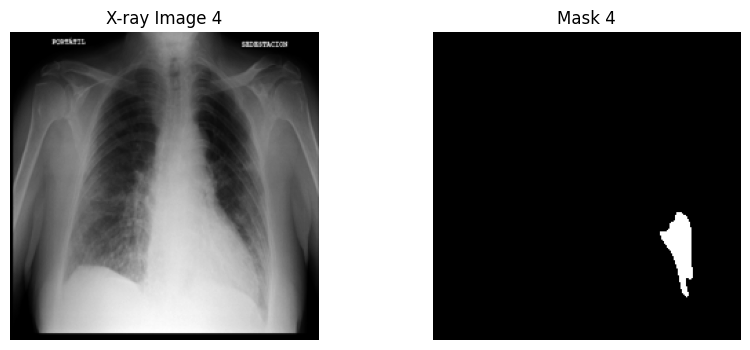

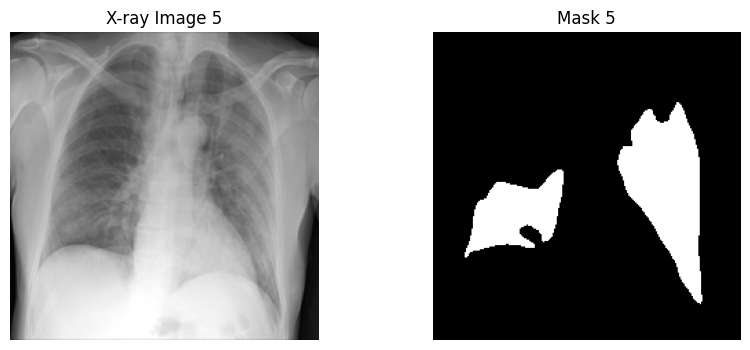

In [ ]:
import matplotlib.pyplot as plt

num_samples = 5

for i in range(num_samples):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'X-ray Image {i+1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(masks[i], cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')

    plt.show()


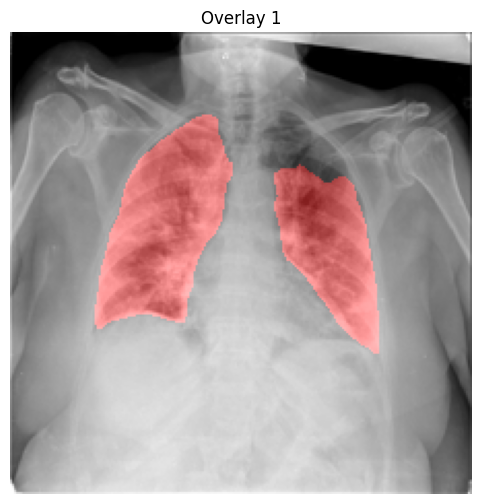

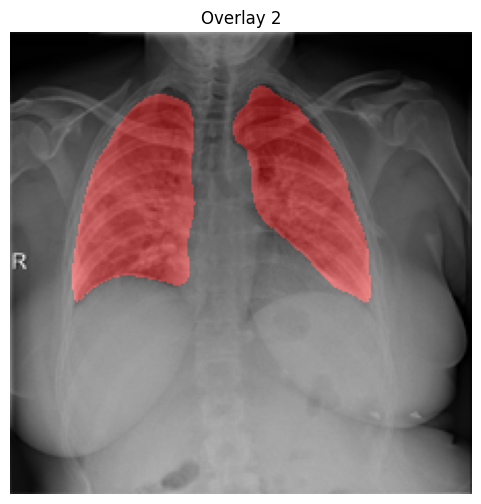

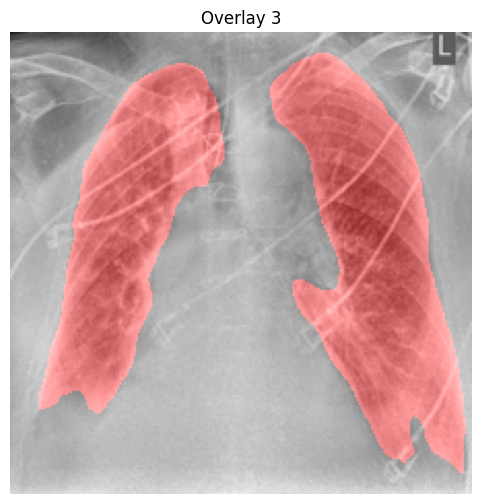

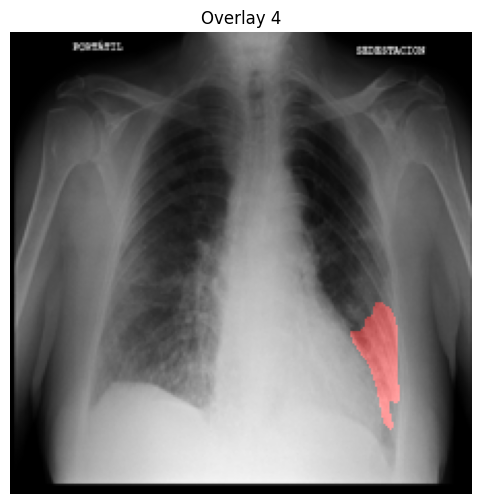

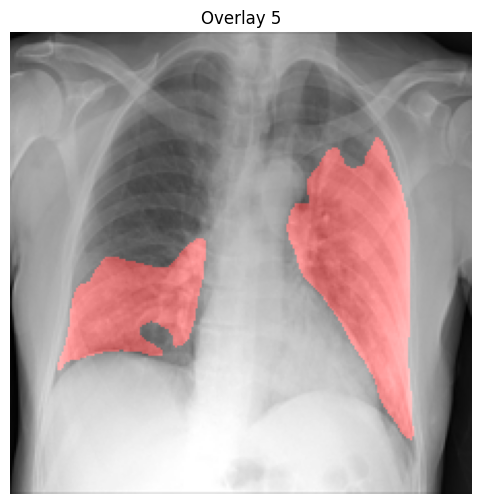

In [ ]:
alpha = 0.4  

for i in range(num_samples):
    image_rgb = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)

    mask_rgb = np.zeros_like(image_rgb)
    mask_rgb[..., 0] = masks[i]  # قرمز

    overlay = cv2.addWeighted(image_rgb, 1, mask_rgb, alpha, 0)

    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.title(f'Overlay {i+1}')
    plt.axis('off')
    plt.show()


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_num = 1

for train_index, val_index in kf.split(processed_images):
    print(f"\n---- Fold {fold_num} ----")

    X_train, X_val = processed_images[train_index], processed_images[val_index]
    y_train, y_val = processed_masks[train_index], processed_masks[val_index]

    print("Train shape:", X_train.shape, y_train.shape)
    print("Validation shape:", X_val.shape, y_val.shape)


    fold_num += 1



---- Fold 1 ----
Train shape: (5716, 224, 224, 1) (5716, 224, 224, 1)
Validation shape: (1429, 224, 224, 1) (1429, 224, 224, 1)

---- Fold 2 ----
Train shape: (5716, 224, 224, 1) (5716, 224, 224, 1)
Validation shape: (1429, 224, 224, 1) (1429, 224, 224, 1)

---- Fold 3 ----
Train shape: (5716, 224, 224, 1) (5716, 224, 224, 1)
Validation shape: (1429, 224, 224, 1) (1429, 224, 224, 1)

---- Fold 4 ----
Train shape: (5716, 224, 224, 1) (5716, 224, 224, 1)
Validation shape: (1429, 224, 224, 1) (1429, 224, 224, 1)

---- Fold 5 ----
Train shape: (5716, 224, 224, 1) (5716, 224, 224, 1)
Validation shape: (1429, 224, 224, 1) (1429, 224, 224, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split

# -----------------------------
# ⬛ ASPP Block
def ASPP(x, filters):
    rates = [2, 3, 4]
    convs = []
    for rate in rates:
        c = layers.Conv2D(filters, 3, padding='same', dilation_rate=rate)(x)
        c = layers.BatchNormalization()(c)
        c = layers.ReLU()(c)
        convs.append(c)
    x = layers.Concatenate()(convs)
    x = layers.Conv2D(filters, 1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# -----------------------------
# ⬛ scSE Attention Block
def scSE_block(input_tensor):
    # Channel Squeeze & Excitation
    cse = layers.GlobalAveragePooling2D()(input_tensor)
    cse = layers.Dense(input_tensor.shape[-1] // 16, activation='relu')(cse)
    cse = layers.Dense(input_tensor.shape[-1], activation='sigmoid')(cse)
    cse = layers.Reshape((1, 1, input_tensor.shape[-1]))(cse)
    cse_out = layers.Multiply()([input_tensor, cse])

    # Spatial Squeeze & Excitation
    sse = layers.Conv2D(1, (1, 1), activation='sigmoid')(input_tensor)
    sse_out = layers.Multiply()([input_tensor, sse])

    return layers.Add()([cse_out, sse_out])

# -----------------------------
# ⬛ Encoder Block
def encoder_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = ASPP(x, filters)
    x = scSE_block(x)
    p = layers.MaxPooling2D(pool_size=(2,2))(x)
    return x, p

# -----------------------------
# ⬛ Decoder Block
def decoder_block(x, skip, filters):
    x = layers.UpSampling2D(size=(2,2))(x)
    x = layers.Concatenate()([x, skip])
    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# -----------------------------
# ⬛ کل مدل COVID-SegNet
def build_covid_segnet(input_shape=(224, 224, 1)):
    inputs = layers.Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 16)
    s2, p2 = encoder_block(p1, 32)
    s3, p3 = encoder_block(p2, 64)
    s4, p4 = encoder_block(p3, 128)

    # Bottleneck
    b = ASPP(p4, 256)

    # Decoder
    d1 = decoder_block(b, s4, 128)
    d2 = decoder_block(d1, s3, 64)
    d3 = decoder_block(d2, s2, 32)
    d4 = decoder_block(d3, s1, 16)

    # Output
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(d4)

    model = models.Model(inputs, outputs, name='COVIDSegNet')
    return model


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(
    processed_images, processed_masks, test_size=0.15, random_state=42
)


In [20]:
model = build_covid_segnet(input_shape=(224, 224, 1))

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "COVIDSegNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 224, 224,  │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 224, 224,  │      2,320 │ re_lu[0][0]       │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 224, 224,  │          0 │ re_lu_1[0][0],    │
│ (Concatenate)       │ 48)               │            │ re_lu_2[0][0],    │
│                     │                   │            │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 224, 224,  │        784 │ concatenate[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │         64 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 2,434,132 (9.29 MB)

 Trainable params: 2,429,204 (9.27 MB)

 Non-trainable params: 4,928 (19.25 KB)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=8
)


Epoch 1/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1386s 2s/step - accuracy: 0.8505 - loss: 0.4346 - val_accuracy: 0.9265 - val_loss: 0.2806
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1355s 2s/step - accuracy: 0.9352 - loss: 0.2463 - val_accuracy: 0.9391 - val_loss: 0.1990
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1403s 2s/step - accuracy: 0.9439 - loss: 0.1854 - val_accuracy: 0.9458 - val_loss: 0.1572
Epoch 4/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1413s 2s/step - accuracy: 0.9504 - loss: 0.1485 - val_accuracy: 0.9508 - val_loss: 0.1337
Epoch 5/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1374s 2s/step - accuracy: 0.9548 - loss: 0.1264 - val_accuracy: 0.9431 - val_loss: 0.1393
Epoch 6/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1369s 2s/step - accuracy: 0.9571 - loss: 0.1131 - val_accuracy: 0.9552 - val_loss: 0.1114
Epoch 7/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1364s 2s/step - accuracy: 0.9605 - loss: 0.1013 - val_accuracy: 0.9535 - val_loss: 0.1112
Epoch 8/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 1367s 2s/step - accuracy: 0.9627 - loss: 0.0933 - 

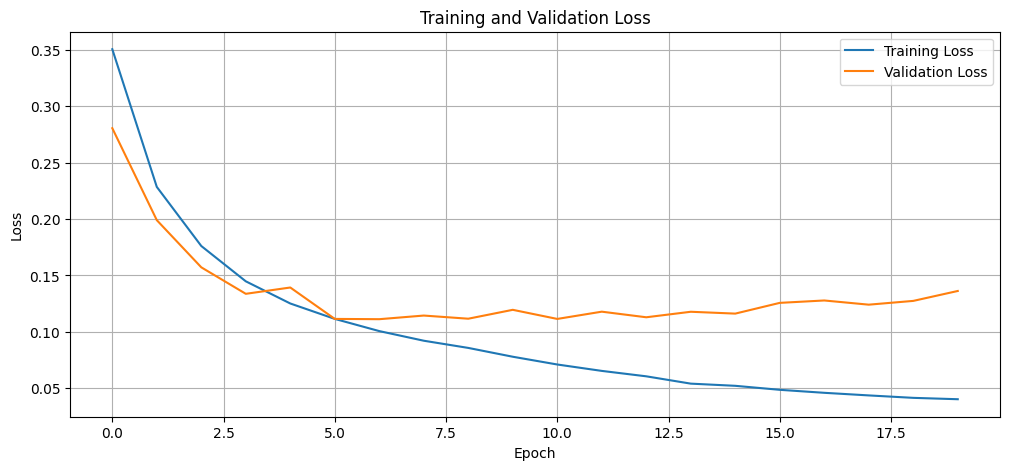

KeyError: 'dice_coefficient'

<Figure size 1200x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# پلات Loss
plt.figure(figsize=(12,5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history_dict['dice_coefficient'], label='Training Dice')
plt.plot(history_dict['val_dice_coefficient'], label='Validation Dice')
plt.title('Training and Validation Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid()
plt.show()


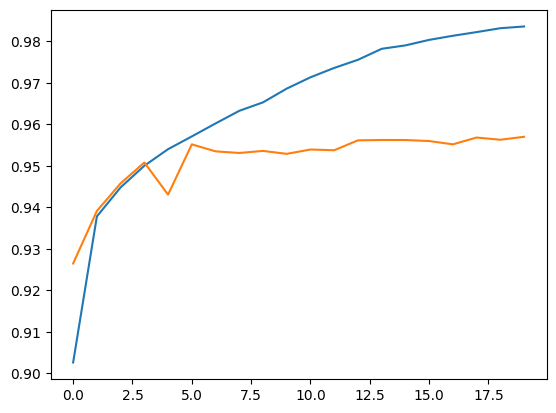

In [31]:
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


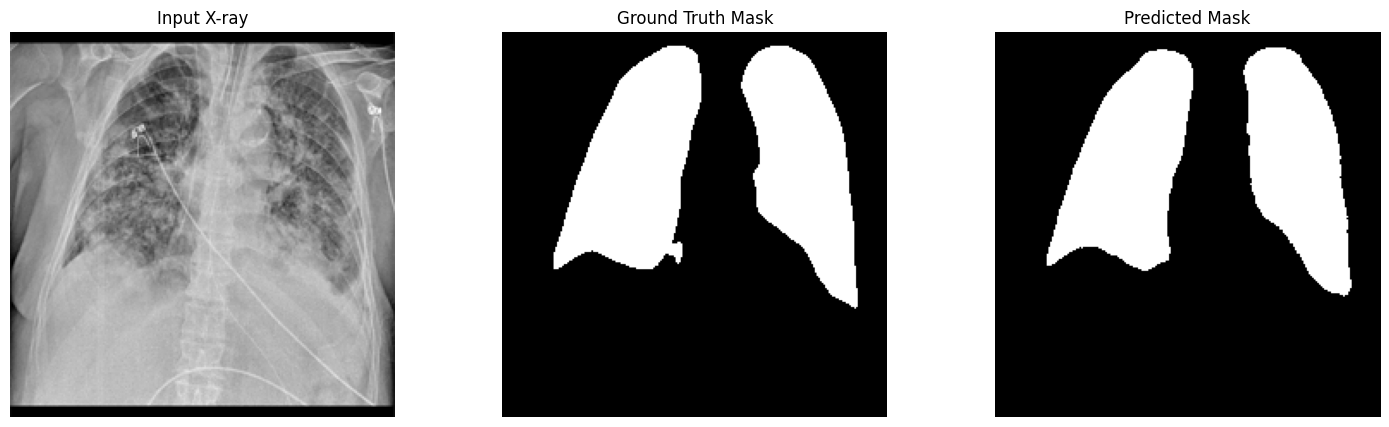

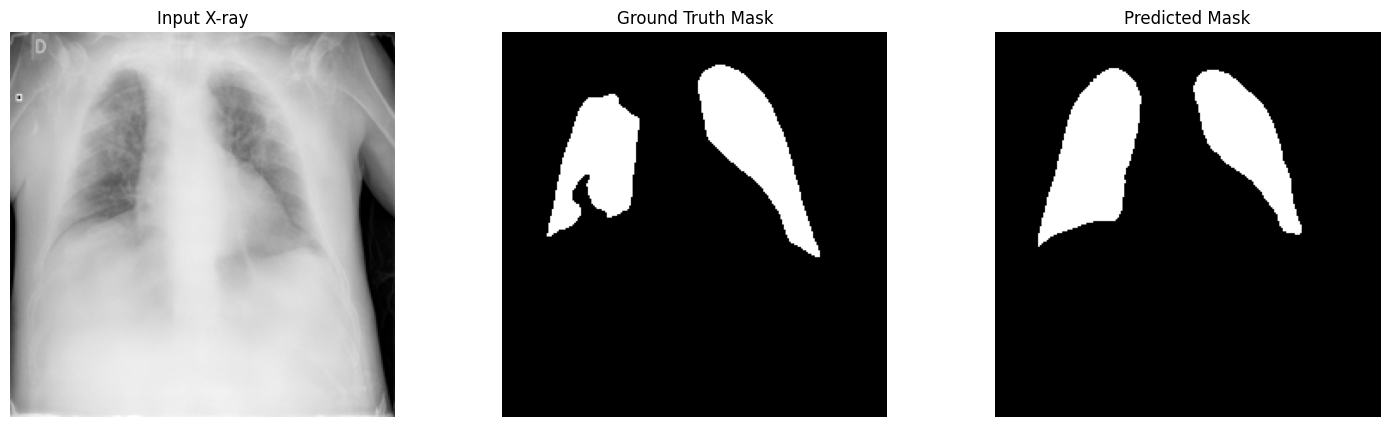

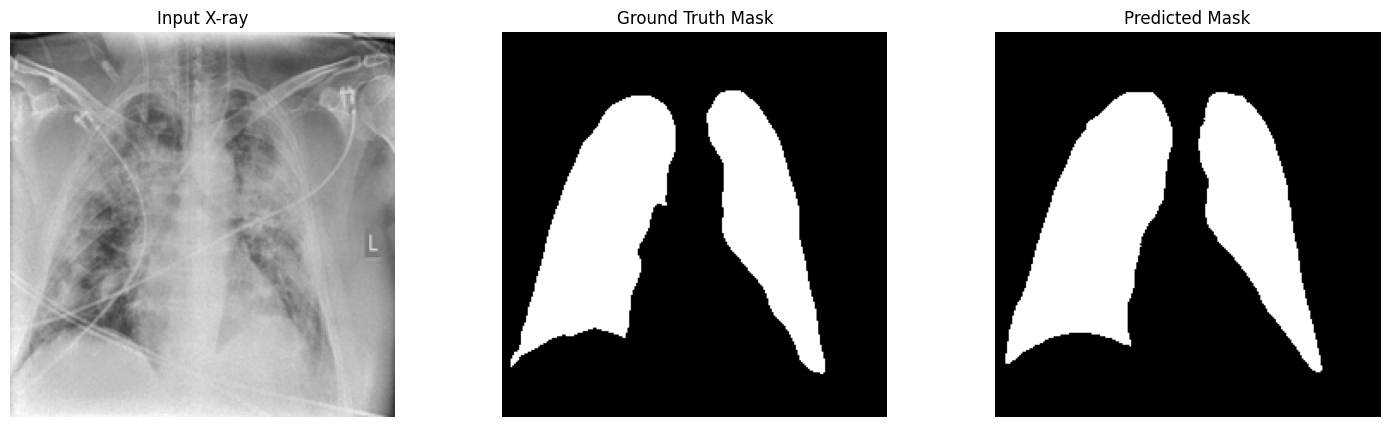

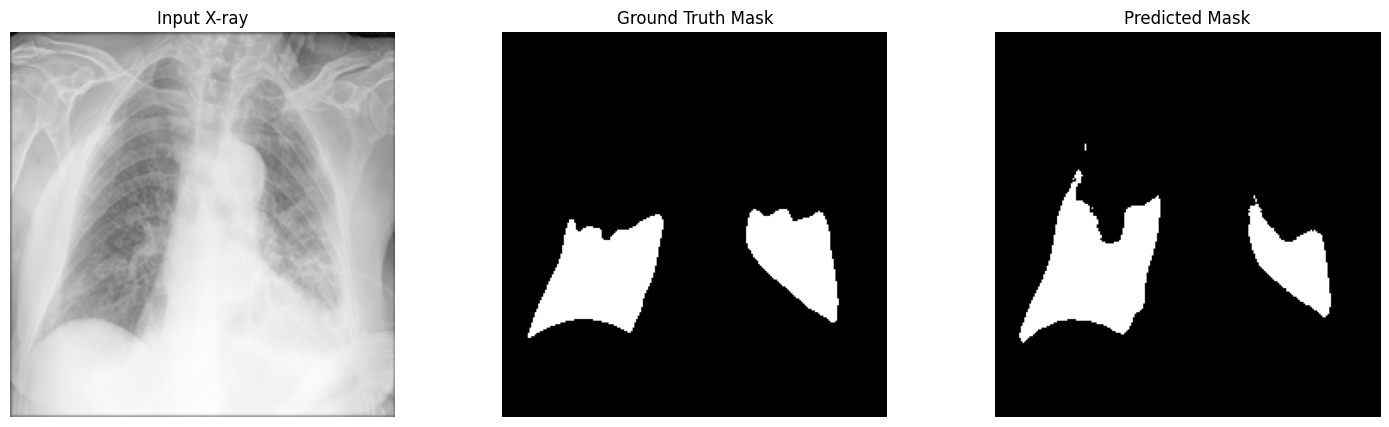

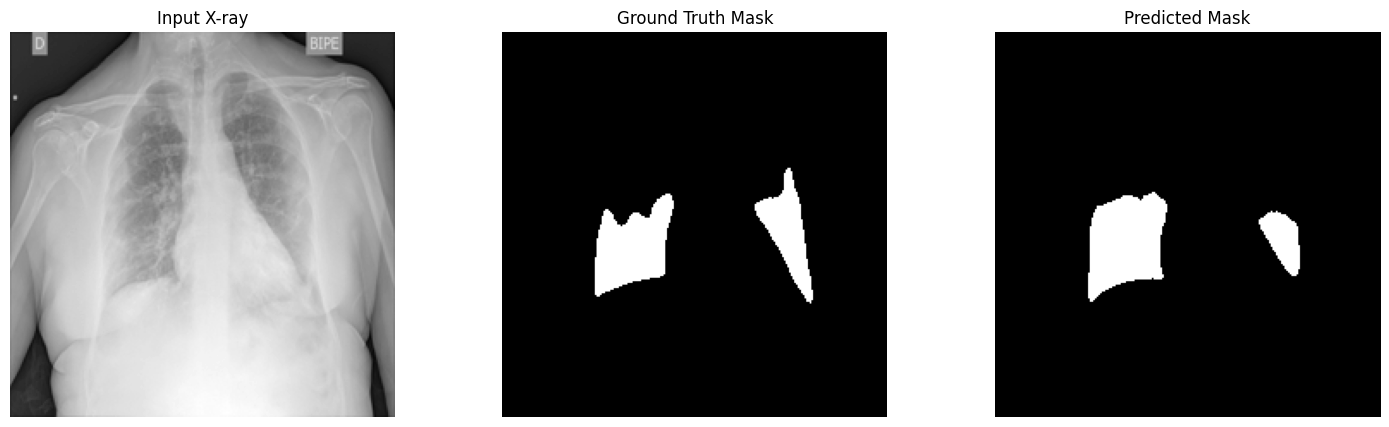

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# تعداد نمونه‌هایی که می‌خوای تست کنی
num_samples = 5

# پیش‌بینی مدل روی چند داده‌ی val
preds = model.predict(X_val[:num_samples])

# اگه می‌خوای threshold بزنی که ماسک باینری بشه:
preds_binary = (preds > 0.5).astype(np.float32)

for i in range(num_samples):
    plt.figure(figsize=(18, 5))

    # تصویر X-ray
    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].squeeze(), cmap='gray')
    plt.title('Input X-ray')
    plt.axis('off')

    # ماسک واقعی
    plt.subplot(1, 3, 2)
    plt.imshow(y_val[i].squeeze(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # ماسک پیش‌بینی شده
    plt.subplot(1, 3, 3)
    plt.imshow(preds_binary[i].squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()
